In [1]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ddgclib._complex import Complex
from ddgclib import *
from ddgclib._complex import *
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._capillary_rise_flow import * #plot_surface#, curvature
from ddgclib._hyperboloid import *
from ddgclib._catenoid import *
from ddgclib._catenoid_error import *
from ddgclib._cylinder import *
from ddgclib._ellipsoid import *
from ddgclib._eos import *
from ddgclib._misc import *
from ddgclib._plotting import *
#from ddgclib._case2 import *

def curvature(v):
    F, nn = vectorise_vnn(v)
    curvature_dict = b_curvatures_hn_ij_c_ij(F, nn)
    HNdA_i = curvature_dict['HNdA_i']
    return HNdA_i

# Parameters for
# a water droplet in air at standard laboratory conditions
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

# Numerical parameters #Stated this is what to plaay
r = 1
theta_p = 20 * np.pi/180.0  # rad, three phase contact angle

refinement=3# NOTE: 2 is the minimum refinement needed for the complex to be manifold

In [2]:
'''
In this part of the code a cylinder mesh will be generated
'''
v_l, v_u = -1.5, 1.5
r = 1

a, b, c = 1, 0, 1  # Geometric parameters of the catenoid; can also be modified
a, b, c = 1, 0, 1  # Geometric parameters of the catenoid; can also be modified
abc = (a, b, c)

u_l, u_u = 0 ,2 * np.pi # condition for an full cylinder # non sense parameter

#HC, bV, K_f, H_f, neck_verts, neck_sols = catenoiderror_N(r, theta_p, gamma, abc,u_l, u_u, v_l, v_u, refinement=refinement, cdist=1e-5, equilibrium=True)

HC, bV, K_f, H_f, neck_verts, neck_sols = cylinder_N(r, theta_p, gamma, abc,u_l, u_u, v_l, v_u, refinement=refinement, cdist=1e-5, equilibrium=True)

# Define bottom boundary condition
boundary_bottom = []
for v in HC.V:
    if v.x[2] == v_l:
        boundary_bottom.append(v)

# Define top boundary condition
boundary_top = []
for v in HC.V:
    if v.x[2] == v_u:
        boundary_top.append(v)


plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [3]:
'''
in this part of the code, the boundarys will be closed with the function close_boundary.

'''
def close_boundary(HC, boundary_top, boundary_bottom):
    v_avg_top = np.zeros(3)
    for v in boundary_top:
        v_avg_top += v.x_a

    v_avg_top = v_avg_top/len(boundary_top)
    v_avg_bottom = np.zeros(3)
    for v in boundary_bottom:
        v_avg_bottom += v.x_a

    v_avg_bottom = v_avg_bottom/len(boundary_bottom)

    vat = HC.V[tuple(v_avg_top)]
    for v in boundary_top:
        v.connect(vat)

    vab = HC.V[tuple(v_avg_bottom)]
    for v in boundary_bottom:
        v.connect(vab)

#    boundary_top.add(vat) # from stefan
#    boundary_bottom.add(vab) # from stefan

    boundary_top.append(vat)
    boundary_bottom.append(vab)
    return HC, boundary_top, boundary_bottom

In [4]:
HC, boundary_top, boundary_bottom = close_boundary(HC, boundary_top, boundary_bottom)

In [5]:
plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [6]:
HC.vertex_face_mesh()

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [7]:
from ddgclib._curvatures_play_20230829 import b_curvatures_hn_ij_c_ij_play

                 self.simplices_fm, A list of (dim + 1)-lists containing vertex
                                    objects in a simplex.

                 self.simplices_fm_i, Same as self.simplices_fm except contains
                                      the indices corresponding to the list in
                                      self.vertices_fm

In [8]:
HC.simplices_fm, HC.simplices_fm_i  # Same as facets

([[array([ 1. ,  0. , -1.5]),
   array([ 0.70710678,  0.70710678, -1.5       ]),
   array([ 0.92387953,  0.38268343, -1.3125    ])],
  [array([ 1. ,  0. , -1.5]),
   array([ 0.70710678,  0.70710678, -1.5       ]),
   array([-4.16333634e-17,  2.77555756e-17, -1.50000000e+00])],
  [array([ 1. ,  0. , -1.5]),
   array([ 0.70710678, -0.70710678, -1.5       ]),
   array([ 0.92387953, -0.38268343, -1.3125    ])],
  [array([ 1. ,  0. , -1.5]),
   array([ 0.70710678, -0.70710678, -1.5       ]),
   array([-4.16333634e-17,  2.77555756e-17, -1.50000000e+00])],
  [array([ 1. ,  0. , -1.5]),
   array([ 1.0000000e+00, -2.4492936e-16, -1.1250000e+00]),
   array([ 0.92387953, -0.38268343, -1.3125    ])],
  [array([ 1. ,  0. , -1.5]),
   array([ 1.0000000e+00, -2.4492936e-16, -1.1250000e+00]),
   array([ 0.92387953,  0.38268343, -1.3125    ])],
  [array([ 1.0000000e+00, -2.4492936e-16,  1.5000000e+00]),
   array([1.   , 0.   , 1.125]),
   array([0.92387953, 0.38268343, 1.3125    ])],
  [array([ 1.00000

In [9]:
plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [10]:
len(boundary_top)

9

In [11]:
plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [12]:
'''
Calculation of an liquid-bridge with the variables v_l, v_u (geometry)
and tau, t_f (for the optimization)
'''

v_l, v_u = -0.5, 0.5 # lower and upper z-coordinate

t = 0  #  initial time (=constant)

tau = 0.1 # =dt
t_f = 1000 # breaking condition in the while-loop



'''
-----------------------------------------------------------
From here, the mesh for an open cylinder is meshed
'''

a, b, c = 1, 0, 1  # Geometric parameters of the catenoid; can also be modified
abc = (a, b, c)
u_l, u_u = 0 ,2 * np.pi

HC, bV, K_f, H_f, neck_verts, neck_sols = catenoiderror_N(r, theta_p, gamma, abc,u_l, u_u, v_l, v_u, refinement=refinement, cdist=1e-5, equilibrium=True)

# Define bottom boundary condition
boundary_bottom = []
for v in HC.V:
    if v.x[2] == v_l:
        boundary_bottom.append(v)

# Define top boundary condition
boundary_top = []
for v in HC.V:
    if v.x[2] == v_u:
        boundary_top.append(v)

'''
-----------------------------------------------------------
From here, the optimization is started
'''

'''
----------------------------------------------------
Dummy parameter for the residual
'''
# runvariable for the iteration tracking
residual_iteration = 0
iteration_list = []

# list to track the progress from df
df_list_max = []
df_list_min = []

# list to track the progress of HNdA
dHNdA_list_min = []
dHNdA_list_max = []

'''
----------------------------------------------------
'''

df_list = [] # unnecessary ???
while t < t_f:
    # Loop through all interior vertices
    cHCV = copy.copy(HC.V)

    # dummy list to find the maximum df
    df_list_dummy       = []
    dHNdA_list_dummy    = []
    for v in cHCV:
        # exclude boundaries
        if v in set(boundary_bottom):
            continue
        # Define top boundary condition
        if v in set(boundary_top):
            continue
        # Compute curvature for each interior vertex
        HNdA_i = curvature(v)
        # HNdA_i, V_i, N_i = ????(v)

# split loop, compute V_total
# start new    for v in cHCV:
#
        #print(HNdA_i)
        # Step in time
        df = -gamma * HNdA_i  # Add compressive force F_c = N_i * (V_initial - V_total)
        v_new = v.x_a - tau/2 * df
        HC.V.move(v, tuple(v_new))
        df_list.append(tau * df) # unnecessary ???

        '''
        Try to implement a Residual with the mean curvature
        '''
        #print(HNdA_i)
        #print(np.linalg.norm(df))
        df_list_dummy.append(np.linalg.norm(df))
        dHNdA_list_dummy.append(np.linalg.norm(HNdA_i))
        #print(df)
    #print(HNdA_i)
    #print(max(df_list_dummy))

    # save the maximum and minimum datas for the Residuals
    df_list_max.append(max(df_list_dummy))
    df_list_min.append(min(df_list_dummy))

    # save the numbers of iteration for lately plotting
    residual_iteration = residual_iteration +1
    iteration_list.append(residual_iteration)

    dHNdA_list_max.append(max(dHNdA_list_dummy))
    dHNdA_list_min.append(min(dHNdA_list_dummy))

    t = tau + t
    #print(df_list_dummy)
#plot_polyscope(HC)


KeyboardInterrupt: 

Text(0.5, 1.0, 'Residuals for HNdA')

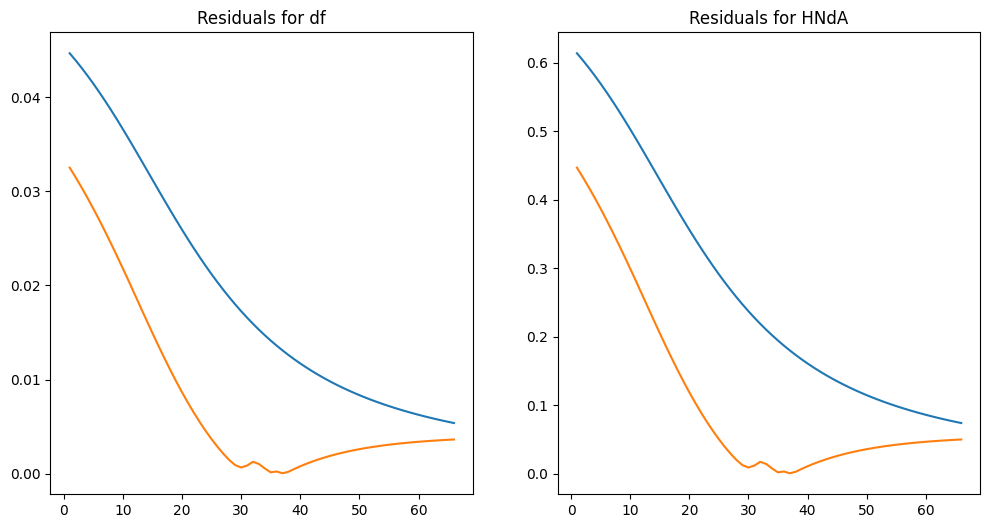

In [13]:
'''
Plot of the residual data
'''
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 6))


ax[0].plot(iteration_list, df_list_max)
ax[0].plot(iteration_list, df_list_min)

ax[1].plot(iteration_list, dHNdA_list_max)
ax[1].plot(iteration_list, dHNdA_list_min)



ax[0].set_title('Residuals for df')
ax[1].set_title('Residuals for HNdA')

In [14]:
plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

In [15]:
F, nn = vectorise_vnn(v)
curvature_dict = b_curvatures_hn_ij_c_ij(F, nn)

curvature_dict.keys()

dict_keys(['F', 'nn', 'n_i', 'E_ij', 'E_jk', 'E_ik', 'E_jl', 'E_il', 'hat_E_ij', 'L_ij', 'Varphi_ij', 'mdp_ij', 'mdp_ik', 'mdp_il', 'j_k', 'j_l', 'Theta_i_jk', 'Wedge_ij_ik', 'A_ijk', 'N_ijk', 'N_ijl', 'C_ijk', 'HNdA_ij', 'HNdA_ij_Cij', 'NdA_ij', 'NdA_ij_Cij', 'C_ij', 'C_ijl', 'i', 'circle_fits', 'circle_wedge', 'j', 'k', 'wedge_ij_ik', 'a_ijk', 'n_ijk', 'c', 'A', 'h_ij', 'b_ij', 'c_ijk', 'a', 'b', 'alpha_ij', 'l', 'wedge_ij_il', 'a_ijl', 'n_ijl', 'arg1', 'arg2', 'varphi_ij', 'beta_ij', 'theta_i_jk', 'v_dual_ijk', 'v_dual_ijl', 'c_ijl', 'theta_i', 'ds', 'HNdA_i', 'NdA_i', 'HN_i', 'C_i', 'K_H_i'])

In [59]:
plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]

# Volumes

In [16]:
def b_curvatures_hn_ij_c_ij_play(F, nn, n_i=None):
    """
    F: Array of vectors forming the star domain of v_i = F[0]
    nn: Connections within each vertex in union with the star domain
    n_i: Normal vector at vertex v_i (approx.)

    :return: cout: A dictionary of local curvatures
    """
    # NOTE: We need a better solution to ensure signed quantities retain their structure.
    #      The mesh must be ordered to ensure we obtain the correct normal face directions
   # print(f'.')
    #print(f'.')
    #print(f'n_i = {n_i}')
    #print(f'F = {F}')
    #print(f'nn = {nn}')
    if n_i is None:
        n_i = normalized(F[0])[0]
    #print(f'n_i = {n_i}')
    # TODO: Later we can cache these containers to avoid extra computations
    # Edges from i to j:
    E_ij = F[1:] - F[0]
    E_ij = np.vstack([np.zeros(3), E_ij])
    E_jk = np.zeros_like(E_ij)
    E_ik = np.zeros_like(E_ij)

    E_jl = np.zeros_like(E_ij)
    E_il = np.zeros_like(E_ij)
    #print(f'E_ij = {E_ij}')
    hat_E_ij = normalized(E_ij)
    # E_ij = e_ij
    L_ij = np.linalg.norm(E_ij, axis=1)
    #print(f'L_ij = {L_ij}')
    Varphi_ij = np.zeros_like(L_ij)

    # Edge midpoints
    mdp_ij = 0.5 * E_ij + F[0]  # = 0.5*E_ik + v_i
    mdp_ik = np.zeros_like(E_ij)
    mdp_il = np.zeros_like(E_ij)

    j_k = np.zeros_like(L_ij)  # Temporary index container for tests (usually not needed outside loop)
    j_l = np.zeros_like(L_ij)  # Temporary index container for tests (usually not needed outside loop)

    # Simplices ijk:
    # Indexed by i=0, j and k is determined by "the neighbour of `i` and `j` that is not `l` "
    Theta_i_jk = np.zeros_like(L_ij)
    Wedge_ij_ik = np.zeros_like(E_ij)
    A_ijk = np.zeros_like(L_ij)
    V_ijk = np.zeros_like(L_ij)
    N_ijk = np.zeros_like(E_ij)
    N_ijl = np.zeros_like(E_ij)

    # Define midpoints
    C_ijk = np.zeros_like(A_ijk)

    # Vector curvature containers
    HNdA_ij = np.zeros_like(E_ij)  # Vector mean curvature normal sums
    HNdA_ij_Cij = np.zeros([len(E_ij), 3])  # Vector mean curvature normal sums divided by dual ara
    NdA_ij = np.zeros_like(E_ij)  # Area curvature normal sums
    NdA_ij_Cij = np.zeros_like(E_ij)  # Area curvature normal sums, weighted
    C_ij = np.zeros_like(A_ijk)  # Dual area around an edge e_ij
    C_ijk = np.zeros_like(A_ijk)  # Dual area
    C_ijl = np.zeros_like(A_ijk)  # Dual area

    i = 0

    circle_fits = []
    circle_wedge = []
    # Note, every neighbour adds  precisely one simplex:
    for j in nn[0]:
        #print(f'-')
        #print(f'j = {j}')
        # Recover indices from nn (in code recover the vertex entry in the cache)

        #print(f'nn = {nn}')
        #print(f'len(nn[j]) = {len(nn[j])}')
        # The boundary edges have only one edge
        if len(nn[j]) == 1:
            #print(f'E_ij[j] = {E_ij[j]}')
            #print(f'np.linalg.norm(E_ij[j]) = {np.linalg.norm(E_ij[j])}')
            circle_fits.append(np.linalg.norm(E_ij[j]))
            circle_wedge.append(E_ij[j])

            # Compute dual area on edge
            k = nn[j][0]  # - 1
            wedge_ij_ik = np.cross(E_ij[j], E_ij[k])


            E_jk[j] = F[k] - F[j]
            E_ik[j] = F[k] - F[i]
            if np.dot(normalized(wedge_ij_ik)[0], n_i) < 0:
                #print(f'WARNING: Wrong direction in boundary curvature')
                #k, l = l, k
                wedge_ij_ik = np.cross(E_ij[k], E_ij[j])  # Maybe?

                E_jk[j] = F[j] - F[k]
                E_ik[j] = F[k] - F[i]
                if np.dot(normalized(wedge_ij_ik)[0], n_i) < 0:
                    print(f'WARNING: STILL THE WRONG DIRECTION')

            v_ijk = (1/6)*np.dot(F[0], wedge_ij_ik)
            V_ijk[j] = v_ijk   # Add volume contribution of triangle ijk
            Wedge_ij_ik[j] = wedge_ij_ik
            # vector product of the parallelogram spanned by f_i and f_j is the triangle area
            a_ijk = np.linalg.norm(wedge_ij_ik) / 2.0
            A_ijk[j] = a_ijk
            n_ijk = wedge_ij_ik / np.linalg.norm(wedge_ij_ik)
            N_ijk[j] = n_ijk

           # E_jk[j] = F[k] - F[j]
            #E_ik[j] = F[k] - F[i]
            # Solve the plane (F[0] = F[i] =current vertex i)
            mdp_ik[j] = 0.5 * E_ik[j] + F[0]
            c = np.zeros(3)
            A = np.zeros([3, 3])
            A[0] = E_ij[j]
            A[1] = E_ik[j]
            A[2] = N_ijk[j]
            c[0] = np.dot(E_ij[j], mdp_ij[j])
            c[1] = np.dot(E_ik[j], mdp_ik[j])
            c[2] = np.dot(N_ijk[j], F[0])
            v_dual = np.linalg.solve(A, c)  # v_dual in the ijk triangle?
            h_ij = np.linalg.norm(0.5 * L_ij[j])
            # = 0.5*E_ik  + F[0] ?   = F[0] -(0.5*E_ik  + F[0]) = 0.5
            b_ij = np.linalg.norm(v_dual - mdp_ij[j])  # wrong?
            c_ijk = 0.5 * b_ij * h_ij
            #C_ij[k] = c_ijk
            C_ij[j] = c_ijk

            # Try adding "half-cotan"
            if 1:
                c = L_ij[j]  # l_ij
                a = np.linalg.norm(F[k] - F[i],
                                   axis=0)  # l_ik  # Symmetric to b
                # b = np.linalg.norm(F[k] - F[l], axis=0)  # l_lk
                b = np.linalg.norm(F[k] - F[j], axis=0)  # l_lk
                alpha_ij = np.arccos((a ** 2 + b ** 2 - c ** 2) / (2.0 * a * b))
                HNdA_ij[j] = (cotan(alpha_ij)) * (F[j] - F[i])

            continue

        k = nn[j][0]  # - 1
        l = nn[j][1]  # - 1

        # Discrete vector area:
        # Simplex areas of ijk and normals
        wedge_ij_ik = np.cross(E_ij[j], E_ij[k])
        if np.dot(normalized(wedge_ij_ik)[0], n_i) < 0:
            k, l = l, k
            wedge_ij_ik = np.cross(E_ij[j], E_ij[k])


        # Save indexes (for testing)
        j_k[j] = k
        j_l[j] = l

        Wedge_ij_ik[j] = wedge_ij_ik

        # Compute volume
        v_ijk = (1/6)*np.dot(F[0], wedge_ij_ik)
        V_ijk[j] = v_ijk   # Add volume contribution of triangle ijk

        # vector product of the parallelogram spanned by f_i and f_j is the triangle area
        a_ijk = np.linalg.norm(wedge_ij_ik) / 2.0
        A_ijk[j] = a_ijk
        n_ijk = wedge_ij_ik / np.linalg.norm(wedge_ij_ik)
        N_ijk[j] = n_ijk

        # Simplex areas of ijl and normals (TODO: RECoVER FROM A MINI IJK CACHE)
        wedge_ij_il = np.cross(E_ij[j], E_ij[l])
        a_ijl = np.linalg.norm(wedge_ij_il) / 2.0
        n_ijl = -wedge_ij_il / np.linalg.norm(wedge_ij_il)  # TODO: TEST THIS
        N_ijl[j] = n_ijl

        # Dihedral angle at oriented edge ij:
        arg1 = np.dot(hat_E_ij[j], np.cross(n_ijk, n_ijl))
        arg2 = np.dot(n_ijk, n_ijl)
        varphi_ij = np.arctan2(arg1, arg2)
        Varphi_ij[j] = varphi_ij  # NOTE: Signed value!

        # Interior angles: # Law of Cosines
        c = L_ij[j]  # l_ij
        a = np.linalg.norm(F[k] - F[i], axis=0)  # l_ik  # Symmetric to b
        #b = np.linalg.norm(F[k] - F[l], axis=0)  # l_lk
        b = np.linalg.norm(F[k] - F[j], axis=0)  # l_lk
        alpha_ij = np.arccos((a ** 2 + b ** 2 - c ** 2) / (2.0 * a * b))
        #a = np.linalg.norm(F[k] - F[i], axis=0)  # l_il  # Symmetric to b
        a = np.linalg.norm(F[l] - F[i], axis=0)  # l_
        b = np.linalg.norm(F[l] - F[j], axis=0)  # l_lj
        beta_ij = np.arccos((a ** 2 + b ** 2 - c ** 2) / (2.0 * a * b))

        ## Curvatures
        # Vector curvatures
        HNdA_ij[j] = (cotan(alpha_ij) + cotan(beta_ij)) * (F[j] - F[i])
        #print(f'(cotan(alpha_ij) + cotan(beta_ij)) * (F[i] - F[j]) = {(cotan(alpha_ij) + cotan(beta_ij)) * (F[i] - F[j])}')
        # NdA_ij[j] = np.cross(F[i], F[j])
        # (^ NOTE: The above vertices i, j MUST be consecutive for this formula to be valid (CHECK!))

        NdA_ij[j] = np.cross(F[j], F[k])
        # NdA_ij[j] = np.cross(F[i], F[j])  #TODO: Check again
        # (^ NOTE: The above vertices j, k MUST be consecutive for this formula
        # to be valid (CHECK!))
        # Scalar component ijk
        # Interior angle
        theta_i_jk = np.arctan2(np.linalg.norm(wedge_ij_ik),
                                np.dot(E_ij[j], E_ij[k]))
        Theta_i_jk[j] = theta_i_jk

        # Areas
        if 1:
            # ijk Areas
            E_jk[j] = F[k] - F[j]
            E_ik[j] = F[k] - F[i]
            # Solve the plane
            mdp_ik[j] = 0.5 * E_ik[j] + F[0]
            c = np.zeros(3)
            A = np.zeros([3, 3])
            A[0] = E_ij[j]
            A[1] = E_ik[j]
            A[2] = N_ijk[j]
            c[0] = np.dot(E_ij[j], mdp_ij[j])
            c[1] = np.dot(E_ik[j], mdp_ik[j])
            c[2] = np.dot(N_ijk[j], F[0])
            v_dual_ijk = np.linalg.solve(A, c)  # v_dual in the ijk triangle?
            h_ij = np.linalg.norm(0.5 * L_ij[j])
            # = 0.5*E_ik  + F[0] ?   = F[0] -(0.5*E_ik  + F[0]) = 0.5
            b_ij = np.linalg.norm(v_dual_ijk - mdp_ij[j])  # wrong?
            c_ijk = 0.5 * b_ij * h_ij
            # ijl Areas
            #  k --> l
            E_jl[j] = F[l] - F[j]
            E_il[j] = F[l] - F[i]
            # Solve the plane
            mdp_il[j] = 0.5 * E_il[j] + F[0]  # is j index ok here? Think so
            c = np.zeros(3)
            A = np.zeros([3, 3])
            A[0] = E_ij[j]
            A[1] = E_il[j]
            A[2] = N_ijl[j]  # Luckily N_ijl appears to exist as suspected
            c[0] = np.dot(E_ij[j], mdp_ij[j])
            c[1] = np.dot(E_il[j], mdp_il[j])
            c[2] = np.dot(N_ijl[j], F[0])
            v_dual_ijl = np.linalg.solve(A, c)  # v_dual in the ijl triangle?
            h_ij = np.linalg.norm(0.5 * L_ij[j])  # = 0.5*E_ik  + F[0] ?   = F[0] -(0.5*E_ik  + F[0]) = 0.5
            b_ij = np.linalg.norm(v_dual_ijl - mdp_ij[j])
            c_ijl = 0.5 * b_ij * h_ij

            # Add full areas
            C_ij[j] = c_ijk + c_ijl  # the area dual to A_ij

        # Compute the Mean normal curvature integral around e_ij
        #print(f'HNdA_ij[j] = {HNdA_ij[j]}')
        #print(f'C_ij[j] = {C_ij[j]}')
        HNdA_ij_Cij[j] = HNdA_ij[j] / C_ij[j]
        NdA_ij_Cij[j] = NdA_ij[j] / C_ij[j]

        #print(f'HNdA_ij_Cij[j] = {HNdA_ij_Cij[j]}')
        #HNdA_ij_Cij[j] = np.dot(HNdA_ij[j], n_i) / (C_ij[j])
        #HNdA_ij_Cij[j] = np.sum(np.dot(HNdA_ij[j], n_i) / (C_ij[j]), axis=0)
        #HNdA_ij_Cij[j] = np.sum(HNdA_ij_Cij[j])

    # Compute angles between boundary edges
    try:
        c_wedge = np.cross(circle_wedge[0], circle_wedge[1])
        # Interior angles: # Law of Cosines
        c = np.linalg.norm(circle_wedge[0] - circle_wedge[1], axis=0)
        a = np.linalg.norm(circle_wedge[0], axis=0)  # l_ik  # Symmetric to b
        b = np.linalg.norm(circle_wedge[1], axis=0)  # l_lk
        theta_i = np.arccos((a ** 2 + b ** 2 - c ** 2) / (2.0 * a * b))
        #print(f'theta_i = {theta_i * 180 / np.pi}')

        #print(f'circle_fits = {circle_fits}')
        #TODO: THIS IS WRONG!
        # In 2D we have:
        # (x - x_c)**2 + (y - y_c)**2 = r**2
        # (x_1 - x_c)**2 + (y_1 - y_c)**2 = r**2
        # (x_2 - x_c)**2 + (y_2 - y_c)**2 = r**2
        # (x_3 - x_c)**2 + (y_3 - y_c)**2 = r**2
        # Subtract the first from the second, and the first from the third to
        # create two linear equations
        # (x_1 - x_c)**2 - (x_2 - x_c)**2  + (y_1 - y_c)**2 - (y_2 - y_c)**2  = 0

        #(x_3 - x_c) ** 2 + (y_3 - y_c) ** 2 = r ** 2
        r_est = np.linalg.norm(circle_fits)
        r_est = np.sqrt(circle_fits[0]**2 +  circle_fits[1]**2)
        #print(f'r_est = {r_est}')

        # Arc length
        ds = theta_i * r_est
    except IndexError:  # Not a boundary
        theta_i = 0.0
        ds = 0.0

    # Normals
    N_ijk = np.array(N_ijk)
    N_ijl = np.array(N_ijl)
    Wedge_ij_ik = np.array(Wedge_ij_ik)
    N_i = np.sum(Wedge_ij_ik, axis=0)
    N_i = normalized(N_i)[0]


    # (^ The integrated area of the unit sphere)

    # Integrated curvatures
    HNdA_i = 0.5 * np.sum(HNdA_ij, axis=0)  # Vector mean curvature normal sums (multiplied by N?)
    # HN_i = 0.5 * np.sum(HN_ij, axis=0)
    NdA_i = (1 / 6.0) * np.sum(NdA_ij, axis=0)  # Vector normal  are sums
    #NdA_ij_Cij = np.sum(NdA_ij_Cij, axis=0)
    # (^ The integrated area of the original smooth surface (a Dual discrete differential 2-form))


    # Point-wise estimates
    HN_i = np.sum(HNdA_i) / np.sum(C_ij)
    # TODO: Need to replace with dot n_i

    HN_i = np.sum(np.dot(HNdA_i, n_i))/np.sum(C_ij)
    #TURN THIS OFF IN NORMAL RUNS:
    if 0:
        HN_i = np.sum(np.dot(HNdA_i, normalized(np.sum(NdA_ij_Cij, axis=0))[0])) / np.sum(C_ij)
    if 0:
        HNdA_i = np.sum(HNdA_ij_Cij, axis=0)
        HN_i = np.sum(
            np.dot(HNdA_i, normalized(np.sum(NdA_ij_Cij, axis=0))[0])) / np.sum(
            C_ij)
    if 1:
        #print(f'C_ij = {C_ij}')
        C_i = np.sum(C_ij, axis=0)

    K_H_i = (HN_i/ 2.0)**2

    # nt development:
    if 0:
        print('-')
        #print(f'HNdA_i= {HNdA_i}')

        print(f'n_i = {n_i}')
        print(f'C_i = {C_i}')
     #   print(f'normalized(C_i) = {normalized(C_i)[0]}')
        nt = []
        for nda, a_ijk in zip(NdA_ij, A_ijk):
            #print(f'nda = {nda}')
            #print(f'a_ijk = {a_ijk}')
            nt.append(nda/a_ijk)

        nt = np.array(nt)
        nt = np.nan_to_num(nt)
        print(f'nt = {nt}')
        nt = np.sum(nt, axis=0)
        print(f'nt = {nt}')
        print(f'normalized(np.sum(NdA_ij/A_ijk, axis=0)) = {normalized(nt)[0]}')
        print(f'normalized(NdA_i ) = {normalized(NdA_i)[0]}')
        print(f'normalized(np.sum(NdA_ij_Cij, axis=0)) '
              f'= {normalized(np.sum(NdA_ij_Cij, axis=0))[0]}')
        print(' ')
        print(f'NdA_i = {NdA_i}')
        print(f'NdA_ij_Cij = {NdA_ij_Cij}')
        #print(f'normalized(HNdA_i) = {normalized(HNdA_i)[0]}')
        #print(f'normalized(HNdA_ij_Cij) = {normalized(np.sum(HNdA_ij_Cij, axis=0))[0]}')
        #print(f'normalized(NdA_i ) = {normalized(NdA_i)[0]}')
        #print(f'HNdA_ij_Cij = {HNdA_ij_Cij}')
    HNdA_ij_Cij = np.sum( np.sum(HNdA_ij_Cij, axis=0))

    return dict(**locals())

In [17]:
#from ddgclib._curvatures_play_20230829 import b_curvatures_hn_ij_c_ij_play

def volume(v):
    F, nn = vectorise_vnn(v)
    curvature_dict = b_curvatures_hn_ij_c_ij_play(F, nn)
    #print(curvature_dict)
    V_ijk = curvature_dict['V_ijk']
    N_i = curvature_dict['N_i']
    #print(N_i)
    return V_ijk


v_l, v_u = -0.5, 0.5 # lower and upper z-coordinate



'''
-----------------------------------------------------------
From here, the mesh for an open cylinder is meshed
'''

a, b, c = 1, 0, 1  # Geometric parameters of the catenoid; can also be modified
abc = (a, b, c)
u_l, u_u = 0 ,2 * np.pi

HC, bV, K_f, H_f, neck_verts, neck_sols = catenoiderror_N(r, theta_p, gamma, abc,u_l, u_u, v_l, v_u, refinement=refinement, cdist=1e-5, equilibrium=True)

# Define bottom boundary condition
boundary_bottom = []
for v in HC.V:
    if v.x[2] == v_l:
        boundary_bottom.append(v)

# Define top boundary condition
boundary_top = []
for v in HC.V:
    if v.x[2] == v_u:
        boundary_top.append(v)
HC, boundary_top, boundary_bottom = close_boundary(HC, boundary_top, boundary_bottom)

#plot_polyscope(HC)

In [18]:
V = 0
for v in HC.V:
    V_ijk = volume(v)
    #print(V_ijk)
    V += np.sum(V_ijk)

V = V/12

In [42]:
V

0.7459468368823017

In [33]:
np.pi*0.5**2 * 1

0.7853981633974483

In [2]:

HC, bV, K_f, H_f, neck_verts, neck_sols = catenoiderror_N(r, theta_p, gamma, abc,u_l, u_u, v_l, v_u, refinement=4, cdist=1e-5, equilibrium=True)

# Define bottom boundary condition
boundary_bottom = []
for v in HC.V:
    if v.x[2] == v_l:
        boundary_bottom.append(v)

# Define top boundary condition
boundary_top = []
for v in HC.V:
    if v.x[2] == v_u:
        boundary_top.append(v)
HC, boundary_top, boundary_bottom = close_boundary(HC, boundary_top, boundary_bottom)

plot_polyscope(HC)

NameError: name 'catenoiderror_N' is not defined

In [44]:
V = 0
for v in HC.V:
    V_ijk = volume(v)
    #print(V_ijk)
    V += np.sum(V_ijk)

V = V/12

In [46]:
V, np.pi*0.5**2 * 1

(0.7753631469530631, 0.7853981633974483)

In [47]:

HC, bV, K_f, H_f, neck_verts, neck_sols = catenoiderror_N(r, theta_p, gamma, abc,u_l, u_u, v_l, v_u, refinement=5, cdist=1e-5, equilibrium=True)

# Define bottom boundary condition
boundary_bottom = []
for v in HC.V:
    if v.x[2] == v_l:
        boundary_bottom.append(v)

# Define top boundary condition
boundary_top = []
for v in HC.V:
    if v.x[2] == v_u:
        boundary_top.append(v)
HC, boundary_top, boundary_bottom = close_boundary(HC, boundary_top, boundary_bottom)

plot_polyscope(HC)

np.zeros([self.V.size(), self.dim]) = [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
self.V[v].index = 0
self.V[v].index = 1
self.V[v].index = 2
self.V[v].index = 3
self.V[v].index = 4
self.V[v].index = 5
self.V[v].index = 6
self.V[v].index = 7
self.V[v].index = 8
self.V[v].index = 9
self.V[v].index = 10
self.V[v].index = 11
self.V[v].index = 12
self.V[v].index = 13
self.V[v].index = 14
self.V[v].index = 15
self.V[v].index = 16
self.V[v].index = 17
self.V[v].index = 18
self.V[v].index = 19
self.V[v].index = 20
self.V[v].index = 21
self.V[v].index = 22
self.V[v].index = 23
self.V[v].index = 24
self.V[v].index = 25
self.V[v].index = 26
self.V[v].index = 27
self.V[v].index = 28
self.V[v].index = 29
self.V[v].index = 30
self.V[v].index = 31
self.V[v].index = 32
self.V[v].index = 33
self.V[v].index = 34
self.V[v].index = 35
self.V[v].index = 36
self.V[v].index = 37
self.V[v].index = 38
self.V[v].index = 39
self.V[v].index = 40
self.V[v].index = 41
self.V[v].index = 42
self.V[v]

In [48]:
V = 0
for v in HC.V:
    V_ijk = volume(v)
    #print(V_ijk)
    V += np.sum(V_ijk)

V = V/12

In [49]:
V, np.pi*0.5**2 * 1

(0.7828785111125254, 0.7853981633974483)

NameError: name 'HC' is not defined